# Homework 1 
## Reperimento dell'Informazione aa 2018/2019
### Zanato Angelica
#### Matricola 1179428

Si presenta qui il codice Python utilizzato per eseguire il test statistico ANOVA 1-way e, in seguito, il Tukey HSD test. 

In [1]:
# Prima di tutto, si importino le librerie necessarie per computare ANOVA e il test di Tukey
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from itertools import chain

Nella cella successiva viene creato un dizionario che, a partire dai risultati ottenuti grazie a trec_eval, contiene tutti i valori richiesti dall'homework, ossia le misure di MAP, Rprec e Precision at 10.
I file sono:
- 1_StopPorterBM25 contiene la run eseguita utilizzando il Porter Stemmer, la stoplist e il modello BM25;
- 2_StopPorterTFIDF contiene la run eseguita utilizzando il Porter Stemmer, la stoplist e il modello TF*IDF;
- 3_PorterBM25 contiene la run eseguita utilizzando il Porter Stemmer e il modello BM25, ma non la stoplist;
- 4_TFIDF contiene la run eseguita utilizzando il modello TF*IDF, ma escludendo lo stemmer e la stoplist.

Nota: Per poter eseguire la cella, è necessario che i suddetti file con i risultati della valutazione siano nella stessa cartella del Jupyter Notebook.

In [2]:
data = []
for nome_run in ('1_StopPorterBM25', '2_StopPorterTFIDF', '3_PorterBM25', '4_TFIDF'):
    d = dict(run=nome_run, ap=[], P_10=[], Rprec=[], all={})
    with open("{}.txt".format(nome_run)) as f:
        for line in f:
            misura, topic, valore = line.split()
            if topic == 'all':
                if misura in ('map', 'Rprec', 'P_10'):
                    d['all'][misura] = float(valore)
            elif misura == 'map':
                # Per evitare confusione, si utilizza ap come nome invece map nel caso di singolo topic
                d['ap'].append(float(valore))
            elif misura in ('Rprec', 'P_10'):
                d[misura].append(float(valore))
    data.append(d)

Nella seguente cellaviene eseguito il test statistico ANOVA 1-way tramite la funzione f_oneway per la misura MAP ottenuta grazie a trec_eval. Infine, viene visualizzato il grafico del test di Tukey con cui si può determinare i sistemi appartenenti al top group.

F_onewayResult(statistic=0.26982242831143299, pvalue=0.84710818797090737)



        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
      group1            group2      meandiff  lower  upper  reject
------------------------------------------------------------------
 1_StopPorterBM25 2_StopPorterTFIDF -0.0005  -0.0865 0.0855 False 
 1_StopPorterBM25    3_PorterBM25   -0.0018  -0.0877 0.0842 False 
 1_StopPorterBM25      4_TFIDF      -0.0251  -0.1111 0.0609 False 
2_StopPorterTFIDF    3_PorterBM25   -0.0012  -0.0872 0.0848 False 
2_StopPorterTFIDF      4_TFIDF      -0.0246  -0.1106 0.0614 False 
   3_PorterBM25        4_TFIDF      -0.0233  -0.1093 0.0626 False 
------------------------------------------------------------------


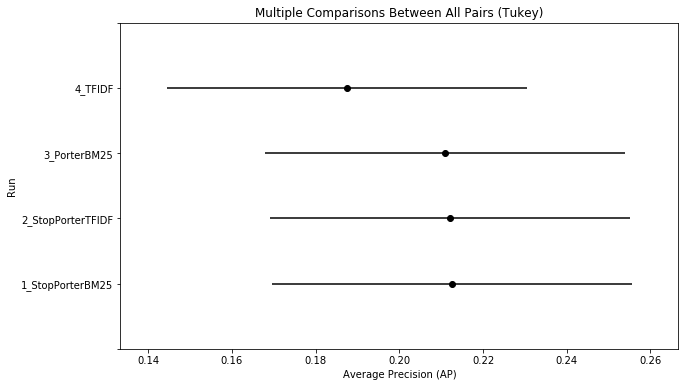

In [3]:
# Esecuzione ANOVA e visualizzazione dei risultati
print(f_oneway(*(x['ap'] for x in data)))
print("\n\n")
multi = MultiComparison(list(chain(*(x['ap'] for x in data))),list(y for y in (x['run'] for x in data) for x in range(50)))
risultato = multi.tukeyhsd()
print(risultato)
# Plot dei risultati ottenuti dal test di Tukey
risultato.plot_simultaneous(xlabel='Average Precision (AP)', ylabel='Run')

Si può notare nel plot precedente che tutti i sistemi fanno parte del top group.

Per interesse, nella seguente cella si esegue il test statistico ANOVA 1-way per le misure Precision at 10 e Rprec.

Precision at 10

F_onewayResult(statistic=0.35778395335621926, pvalue=0.78356008941538735)



        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
      group1            group2      meandiff  lower  upper  reject
------------------------------------------------------------------
 1_StopPorterBM25 2_StopPorterTFIDF  -0.004  -0.1572 0.1492 False 
 1_StopPorterBM25    3_PorterBM25    -0.01   -0.1632 0.1432 False 
 1_StopPorterBM25      4_TFIDF       -0.054  -0.2072 0.0992 False 
2_StopPorterTFIDF    3_PorterBM25    -0.006  -0.1592 0.1472 False 
2_StopPorterTFIDF      4_TFIDF       -0.05   -0.2032 0.1032 False 
   3_PorterBM25        4_TFIDF       -0.044  -0.1972 0.1092 False 
------------------------------------------------------------------


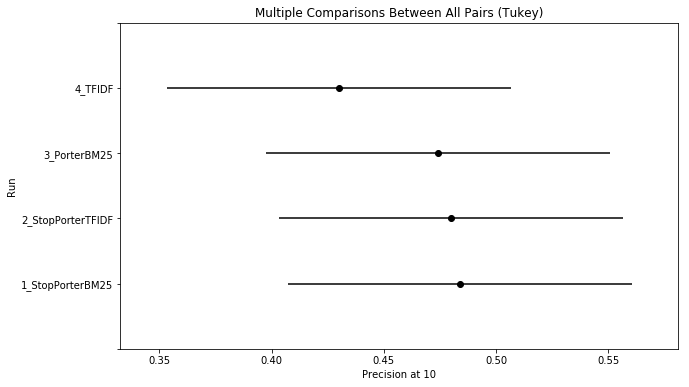

In [4]:
# Esecuzione ANOVA e visualizzazione dei risultati
print ("Precision at 10\n")
print(f_oneway(*(x['P_10'] for x in data)))
print("\n\n")
multi = MultiComparison(list(chain(*(x['P_10'] for x in data))),list(y for y in (x['run'] for x in data) for x in range(50)))
risultato = multi.tukeyhsd()
print(risultato)
# Plot dei risultati ottenuti dal test di Tukey
risultato.plot_simultaneous(xlabel='Precision at 10', ylabel='Run')

Rprecision

F_onewayResult(statistic=0.35084941805375086, pvalue=0.78857474930277416)



        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
      group1            group2      meandiff  lower  upper  reject
------------------------------------------------------------------
 1_StopPorterBM25 2_StopPorterTFIDF  0.0019  -0.0801 0.0839 False 
 1_StopPorterBM25    3_PorterBM25    0.0034  -0.0786 0.0854 False 
 1_StopPorterBM25      4_TFIDF      -0.0246  -0.1066 0.0574 False 
2_StopPorterTFIDF    3_PorterBM25    0.0015  -0.0805 0.0835 False 
2_StopPorterTFIDF      4_TFIDF      -0.0265  -0.1085 0.0555 False 
   3_PorterBM25        4_TFIDF       -0.028   -0.11  0.054  False 
------------------------------------------------------------------


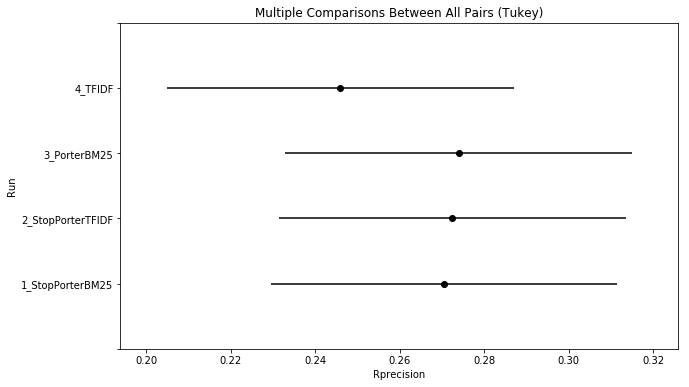

In [5]:
# Esecuzione ANOVA e visualizzazione dei risultati
print("Rprecision\n")
print(f_oneway(*(x['Rprec'] for x in data)))
print("\n\n")
multi = MultiComparison(list(chain(*(x['Rprec'] for x in data))),list(y for y in (x['run'] for x in data) for x in range(50)))
risultato = multi.tukeyhsd()
print(risultato)
# Plot dei risultati ottenuti dal test di Tukey
risultato.plot_simultaneous(xlabel='Rprecision', ylabel='Run')

Nei tre casi testati risulta che tutte le run fanno parte del top group.